In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import classification_report

**Load and inspect data**


In [2]:
data = pd.read_csv("Linear_Data.csv")

In [3]:
data.sample(5)

,Feature1,Feature2,Target
41,1.250000,3.1937,0
27,2.482700,2.0373,0
0,1.964300,4.5957,1
16,3.657900,3.8692,1
50,0.086405,4.1045,1


In [4]:
data.shape

(51, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  51 non-null     float64
 1   Feature2  51 non-null     float64
 2   Target    51 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature1,51.0,2.268780,0.928531,0.086405,1.57255,2.2753,2.95505,4.0150
Feature2,51.0,3.132512,0.753256,1.617700,2.63600,3.0709,3.53140,4.6162
Target,51.0,0.411765,0.497050,0.000000,0.00000,0.0000,1.00000,1.0000


**Prepare data**


In [7]:
X = data.drop("Target", axis=1).values
y = data["Target"].values

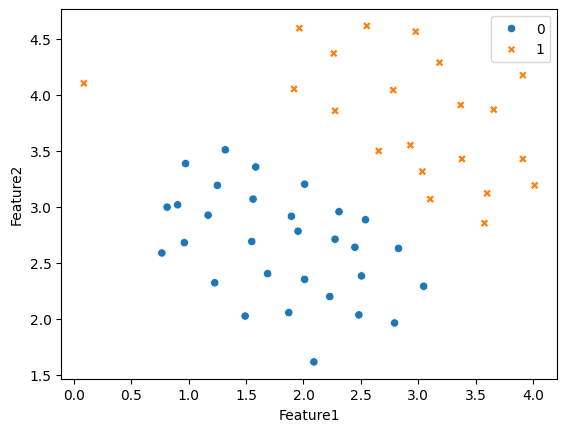

In [8]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], style=y, hue=y)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

**Function to plot SVM decision boundary**


In [9]:
def plot_decision_boundary(
    model,
    X,
    y,
    svc=False,
    scaler=None,
    step_size=0.01,
    xlabel=None,
    ylabel=None,
    title=None,
):
    if scaler != None:
        X = scaler.inverse_transform(X)
    y = y.ravel()

    # Calculate range based on feature median for coverage
    x_range, y_range = np.median(X[:, 0]) / 4, np.median(X[:, 1]) / 4
    x_min, x_max = X[:, 0].min() - x_range, X[:, 0].max() + x_range
    y_min, y_max = X[:, 1].min() - y_range, X[:, 1].max() + y_range

    # Define step size for mesh grid
    # step_size -> Increase the step size to reduce memory usage
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size)
    )

    # Predict on the mesh grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    if scaler == None:
        Z = model.predict(grid_points).reshape(xx.shape)
    else:
        Z = model.predict(scaler.transform(grid_points)).reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap="Paired", alpha=0.5)

    # Plot data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor="k")

    if svc:
        sv = model.support_vectors_
        plt.scatter(
            sv[:, 0], sv[:, 1], facecolors="none", edgecolors="k", linewidths=2, label="sv"
        )

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title("Decision Boundary with Data Points" if title == None else title)
    plt.xlabel("Feature_1" if xlabel == None else xlabel)
    plt.ylabel("Feature_2" if ylabel == None else ylabel)
    plt.legend()
    plt.show()

#### **The C Hyperparameter**
The `C` parameter is inversely proportional to the margin size, this means that the **larger** the value of `C`, the **smaller** the margin, and, conversely, the **smaller** the value of `C`, the **larger** the margin. The `C` parameter can be used along with any kernel, it tells the algorithm how much to avoid misclassifying each training sample, due to that, it is also known as **regularization**. Our linear kernel SVM has used a `C` of 1.0, which is a **large** value and gives a **smaller margin**.

![](https://s3.stackabuse.com/media/articles/understanding-svm-hyperparameters-1.png)

**Train and plot SVM With Small C**


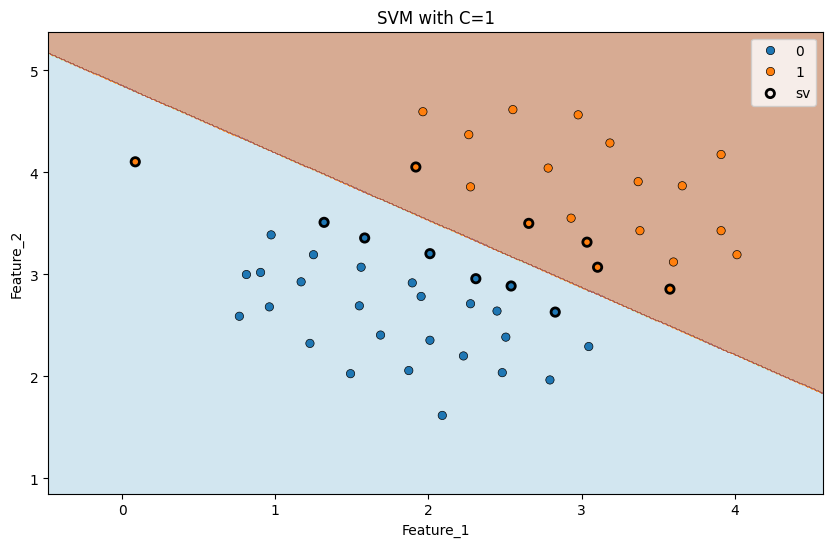

In [10]:
# Small C ==  Big Margin
clf_1 = SVC(C=1, kernel="linear")
clf_1.fit(X, y)
plot_decision_boundary(clf_1, X, y, svc=True, title="SVM with C=1")

**Train and plot SVM With Large C**


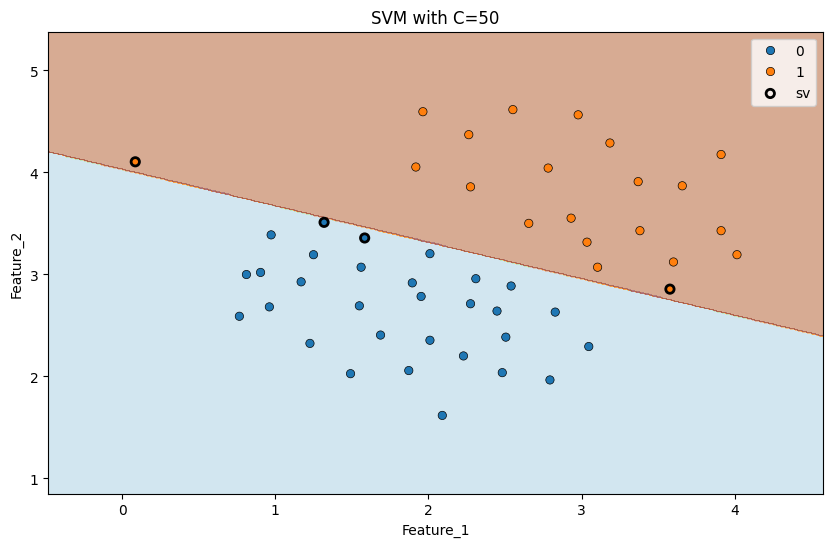

In [11]:
# Big C ==  Small Margin
clf_2 = SVC(C=50, kernel="linear")
clf_2.fit(X, y)

plot_decision_boundary(clf_2, X, y, svc=True, title="SVM with C=50")